In [1]:
!pip install lightweight-gan

  Obtaining dependency information for einops>=0.3 from https://files.pythonhosted.org/packages/29/0b/2d1c0ebfd092e25935b86509a9a817159212d82aa43d7fb07eca4eeff2c2/einops-0.7.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.5 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=bddad95f96478854a0426a6c7c18f1d1e2f11b719ffaf875a90e7ec85e175c9b
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
!lightweight_gan --data /kaggle/input/nft-cyberpunk/images/ --image-size 64 --name my_gan_run --batch-size 16 --gradient-accumulate-every 4 --num-train-steps 25000 --amp --multi-gpus

In [2]:
!lightweight_gan \
  --name my_gan_run \
  --show-progress \
  --generate-types [default,ema] \
  --num-image-tiles 5

Generating progress images: 100%|███████████████| 26/26 [00:41<00:00,  1.58s/it]


In [3]:
!ffmpeg -framerate 30 -pattern_type glob -i 'results/my_gan_run-progress/*-ema.jpg' out.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [4]:
from IPython.display import Video

# Specify the path to your video file
video_path = "out.mp4"

# Display the video
Video(video_path)


In [5]:
!lightweight_gan \
  --name my_gan_run \
  --load-from 25 \
  --generate \
  --num-image-tiles 64

loading from version 1.1.1
Saving generated EMA images: 100%|██████████████| 64/64 [00:00<00:00, 75.08it/s]
sample images generated at /kaggle/working/results/my_gan_run-generated-25


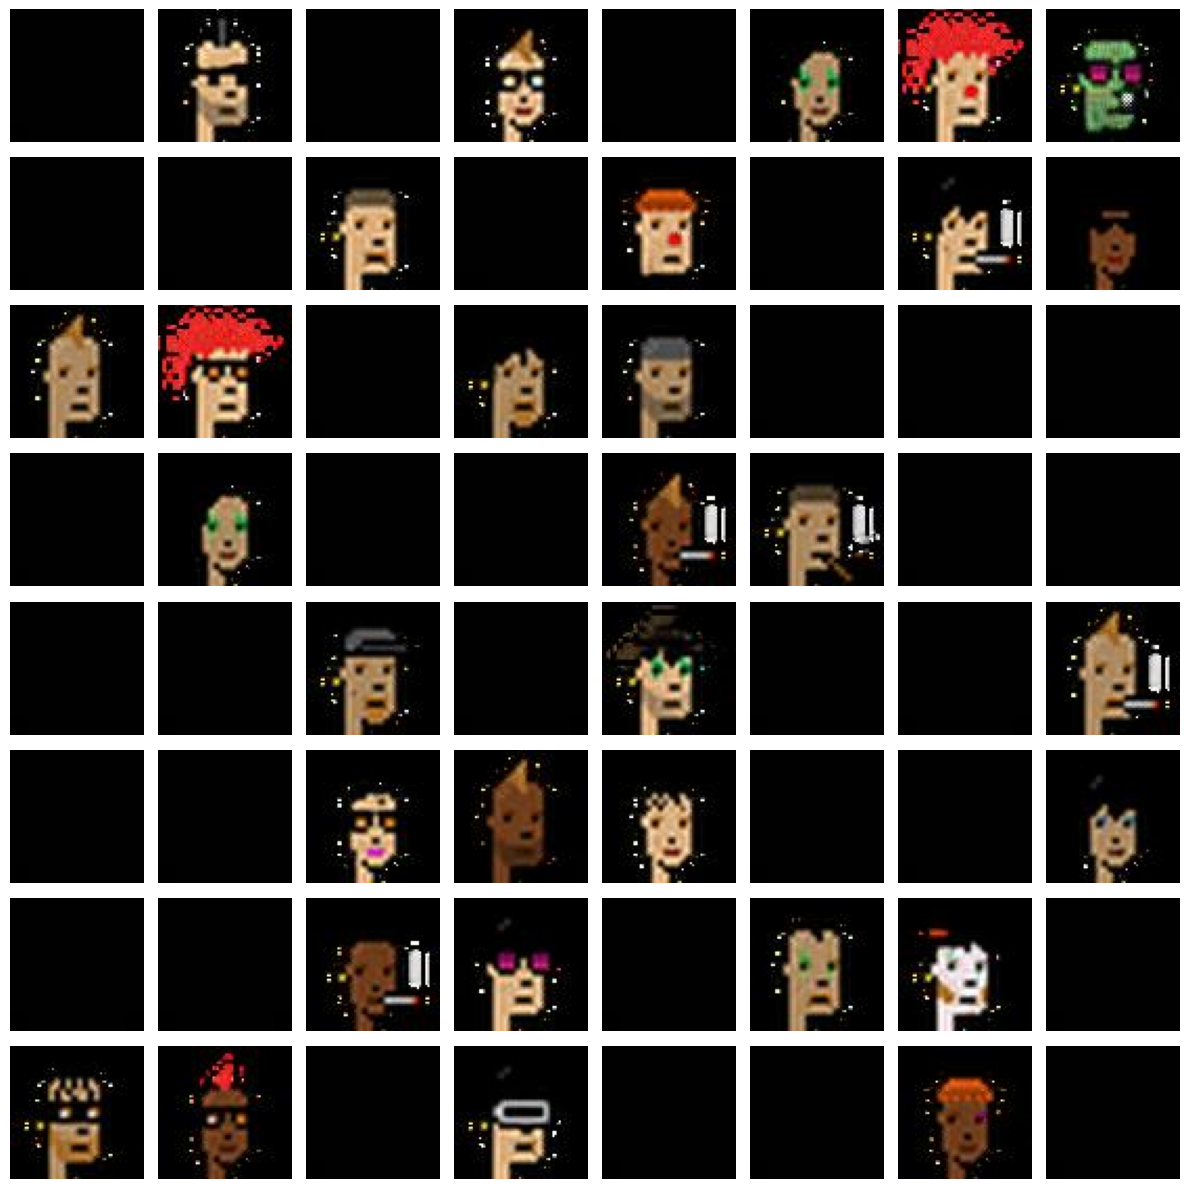

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import math
import os

# Path to the directory containing the generated images
generated_images_dir = '/kaggle/working/results/my_gan_run-generated-25/'

# Use glob to get the paths of all generated images
generated_image_paths = glob.glob(os.path.join(generated_images_dir, '*.jpg'))

# Calculate the number of rows and columns for the grid
num_rows = 8
num_cols = 8

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Display each generated image in the grid
for i in range(num_rows):
    for j in range(num_cols):
        # Calculate the index for the current image
        index = i * num_cols + j

        # Check if the index is within the number of generated images
        if index < len(generated_image_paths):
            img_path = generated_image_paths[index]
            img = Image.open(img_path)

            # Display the image on the current subplot
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


In [10]:
!pip install aim

In [11]:
import torch
from PIL import Image
from torchvision import transforms
from lightweight_gan import Trainer

def generate_images_from_checkpoint_with_sample(model_name, checkpoint_num, sample_image_path, output_dir, num_images=8):
    # Initialize Trainer
    trainer = Trainer(name=model_name)

    # Load the specified checkpoint
    trainer.load(checkpoint_num)

    # Load and preprocess the sample image
    sample_image = Image.open(sample_image_path)
    preprocess = transforms.Compose([
        transforms.Resize((trainer.image_size, trainer.image_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    conditional_input = preprocess(sample_image).unsqueeze(0)

    # Generate images based on the sample
    generated_images_dir = trainer.generate(num=num_images)

    print(f"Generated images saved at: {generated_images_dir}")

if __name__ == "__main__":
    # Specify the model name, checkpoint number, and sample image path
    model_name = 'my_gan_run'
    checkpoint_num = 25
    sample_image_path = '/kaggle/input/sampleimage/IMG-0034.jpg'

    # Specify the output directory and the number of images to generate
    output_dir = '/kaggle/working/'
    num_images = 8

    # Generate images from the specified checkpoint with the sample image
    generate_images_from_checkpoint_with_sample(model_name, checkpoint_num, sample_image_path, output_dir, num_images)


loading from version 1.1.1


Saving generated EMA images: 100%|██████████| 4/4 [00:00<00:00, 37.79it/s]


Generated images saved at: /kaggle/working/results/my_gan_run-generated-None


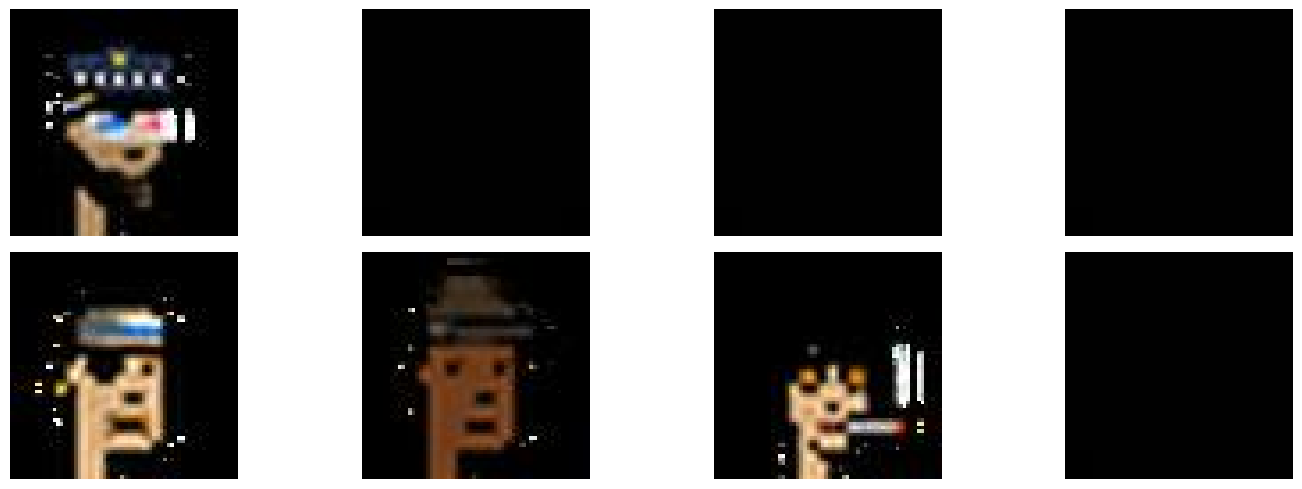

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os
import math

# Path to the directory containing the generated images
generated_images_dir = '/kaggle/working/results/my_gan_run-generated-None/'

# Use glob to get the paths of all generated images
generated_image_paths = glob.glob(os.path.join(generated_images_dir, '*.jpg'))

# Calculate the number of images
num_images = len(generated_image_paths)

# Set the number of columns for the subplots (you can adjust this based on your preference)
num_columns = min(num_images, 4)  # Adjust the number of columns as needed

# Calculate the number of rows needed
num_rows = math.ceil(num_images / num_columns)

# Create a new figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))

# Display each generated image in a subplot
for i, img_path in enumerate(generated_image_paths):
    row_index = i // num_columns
    col_index = i % num_columns
    img = Image.open(img_path)
    axes[row_index, col_index].imshow(img)
    axes[row_index, col_index].axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()
